In [609]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
pd.set_option('display.max_rows',1000)
warnings.filterwarnings('ignore')
%matplotlib inline

In [610]:
df = pd.read_csv('car_evaluation.csv', header=None)

In [611]:
df.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [612]:
df.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


In [613]:
df['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [614]:
pd.set_option('display.max_rows', None)
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

for col in col_names:
    print(df.value_counts(col))

buying
high     432
low      432
med      432
vhigh    432
dtype: int64
maint
high     432
low      432
med      432
vhigh    432
dtype: int64
doors
2        432
3        432
4        432
5more    432
dtype: int64
persons
2       576
4       576
more    576
dtype: int64
lug_boot
big      576
med      576
small    576
dtype: int64
safety
high    576
low     576
med     576
dtype: int64
class
unacc    1210
acc       384
good       69
vgood      65
dtype: int64


In [615]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [616]:
X = df.drop(['class'], axis='columns')
y = df['class']

In [617]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [618]:
import category_encoders as ce 

encoder = ce.OrdinalEncoder(cols = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

X_train = encoder.fit_transform(X_train)
X_test = encoder.fit_transform(X_test)

In [619]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
809,1,1,1,1,1,1
1244,2,1,2,2,2,1
547,1,2,3,2,1,2
1141,2,3,2,2,1,2
903,2,4,1,3,3,3


In [620]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
316,1,1,1,1,1,1
1367,2,2,2,2,2,2
961,3,2,1,2,2,1
519,4,2,1,3,2,3
55,1,2,2,3,1,1


In [621]:
from sklearn import tree
model = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)

model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [622]:
y_train_pred = model.predict(X_train)

In [623]:
from sklearn.metrics import accuracy_score

accuracy_score(y_train, y_train_pred)

1.0

In [624]:
model.score(X_test, y_test)

0.5446584938704028

In [625]:
y_test.value_counts()

unacc    396
acc      127
good      25
vgood     23
Name: class, dtype: int64

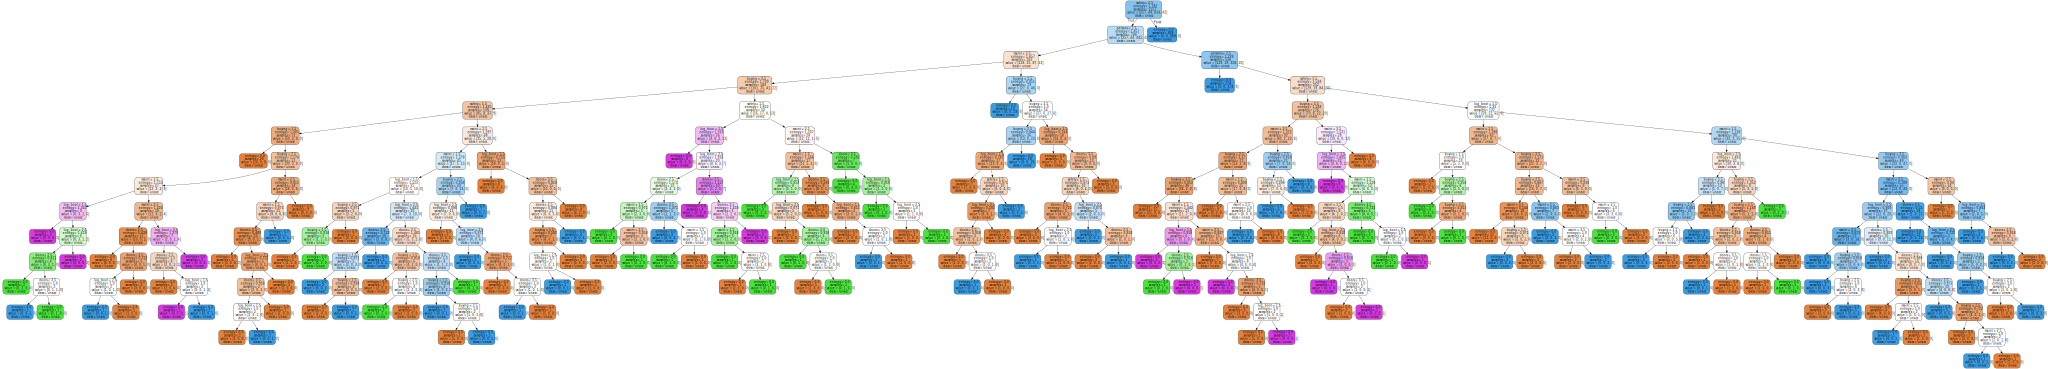

In [626]:
import graphviz
t = tree.export_graphviz(model, feature_names=X.columns, class_names=y_train, filled=True,
rounded=True, special_characters=True)

graph = graphviz.Source(t)
graph
